In [94]:
import pandas as pd
import math as mt
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [3]:
dfad = pd.read_csv("frag/events_of_ad campaign hit.csv",index_col = 0)

In [4]:
dfad.head()

,timestamp,event,person,url,campaign_source
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,google
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,google
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,google


Text(0,0.5,'Empresas de advertising')

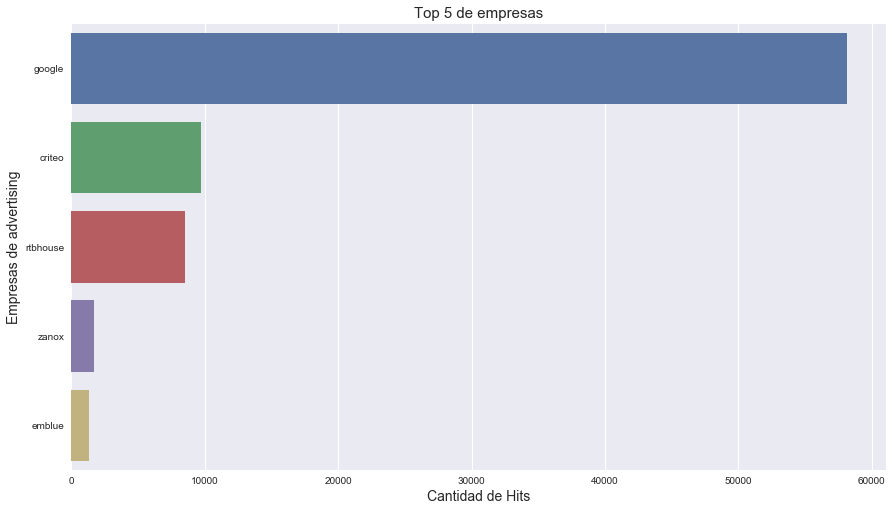

In [5]:

eventos = dfad.groupby('campaign_source').size().sort_values(ascending = False).head(5)

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = eventos.values, y = eventos.index)
g.set_title("Top 5 de empresas", fontsize=15)
g.set_xlabel("Cantidad de Hits", fontsize=14)
g.set_ylabel("Empresas de advertising", fontsize=14)

In [6]:
dfad["dt"] = pd.to_datetime(dfad["timestamp"])

In [7]:
dfad["hour"] = dfad["dt"].dt.hour

In [8]:

aplot = dfad.groupby("hour").size().sort_index(ascending = False)
#aplot = aplot.T
aplot.head(24)

hour
23    5525
22    4868
21    4928
20    4520
19    4576
18    4794
17    4766
16    5159
15    4787
14    4949
13    4697
12    3888
11    2907
10    1636
9      898
8      443
7      327
6      439
5      772
4     1340
3     2449
2     3826
1     4918
0     5415
dtype: int64

Text(0,0.5,'# hits')

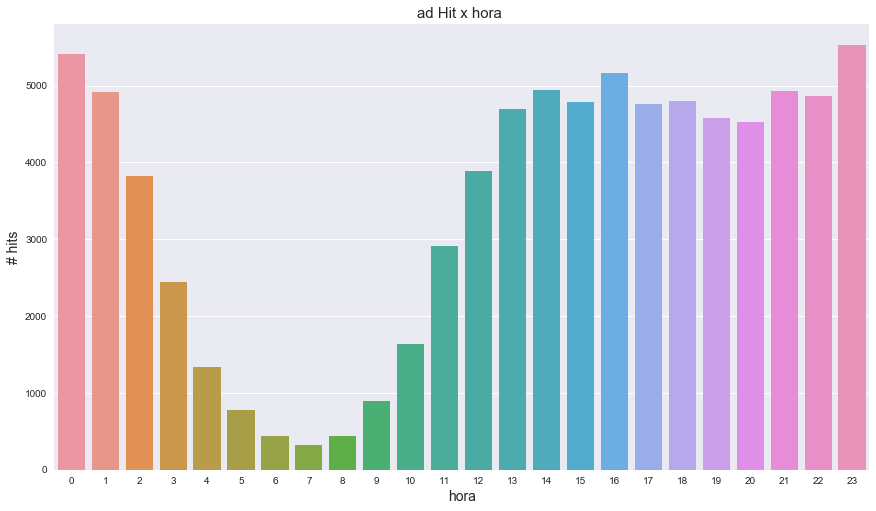

In [9]:
sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = aplot.index, y = aplot.values)
g.set_title("ad Hit x hora ", fontsize=15)
g.set_xlabel("hora", fontsize=14)
g.set_ylabel("# hits", fontsize=14)

In [95]:
aplot2 = dfad.loc[dfad["campaign_source"] == "criteo"].groupby("hour").size().sort_index(ascending = False)


In [96]:
aplot3 = dfad.loc[dfad["campaign_source"] == "rtbhouse"].groupby("hour").size().sort_index(ascending = False)

In [97]:
aplot1 = dfad.loc[dfad["campaign_source"] == "google"].groupby("hour").size().sort_index(ascending = False)

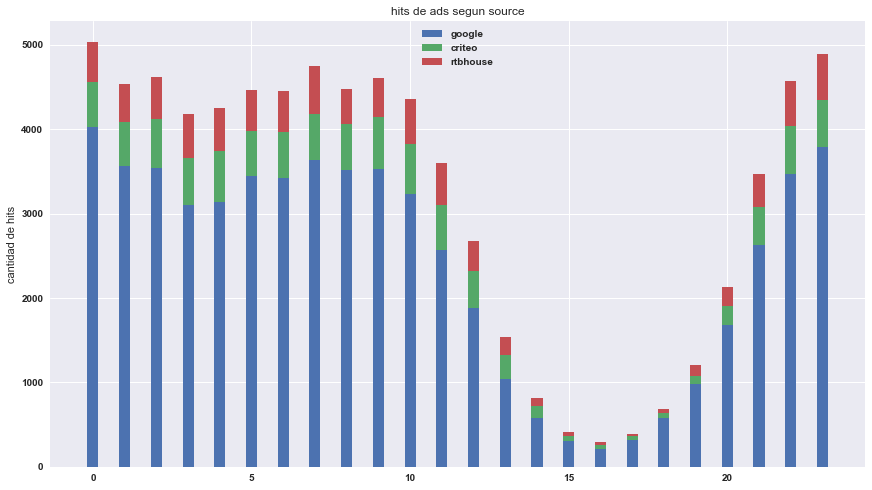

In [159]:
N = 24
arr1 = aplot1.values
arr2 = aplot2.values
arr3 = aplot3.values
ind = aplot1.index


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, arr1, width)
p2 = plt.bar(ind, arr2, width,bottom=arr1)
p3 = plt.bar(ind,arr3,width,bottom = arr1+arr2)


plt.ylabel('cantidad de hits')
plt.title('hits de ads segun source')
plt.legend((p1[0], p2[0],p3[0]), ('google', 'criteo',"rtbhouse"))

plt.show()


Text(0.5,0,'cantidad de hits de las personas')

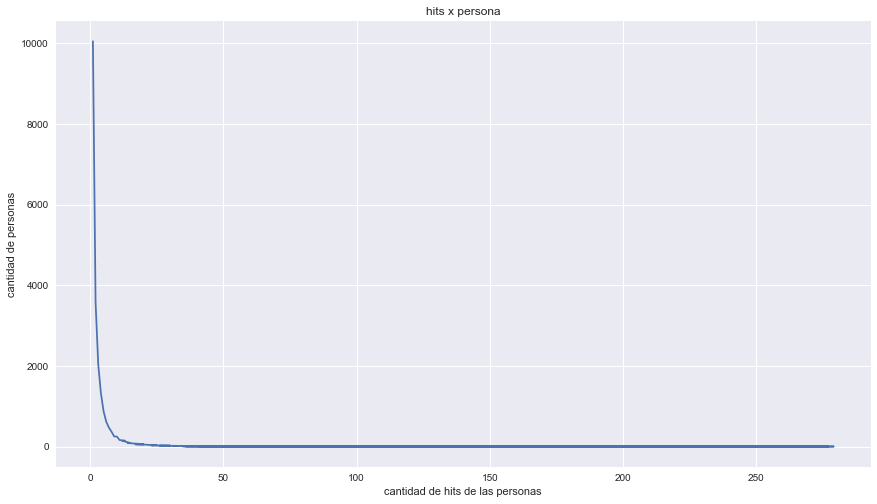

In [73]:
aplot = dfad.groupby("person").size().value_counts()
#aplot.plot(kind = "line",title = "hits x persona")
plot = aplot.plot(kind = "line",title = "hits x persona")
plot.set_ylabel("cantidad de personas")
plot.set_xlabel( "cantidad de hits de las personas")

Text(0,0.5,'cantidad de hits de las personas')

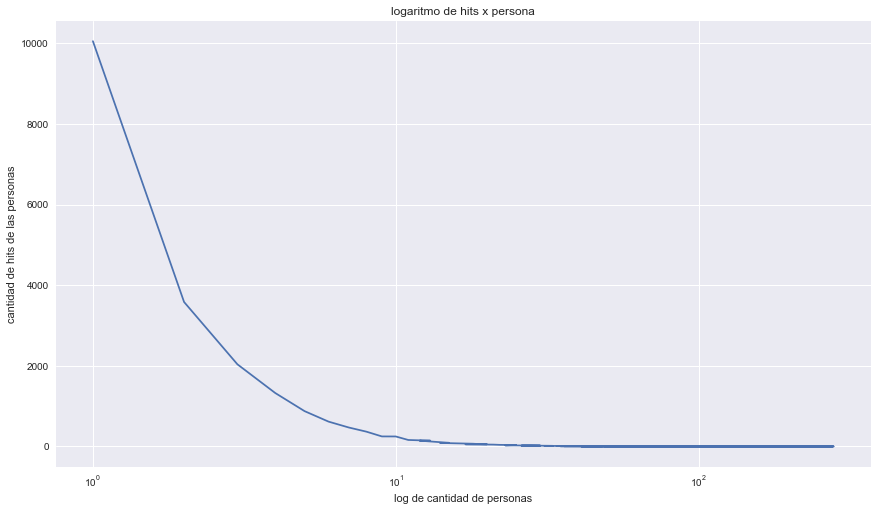

In [72]:
plot = aplot.plot(logx = True,title = "logaritmo de hits x persona")
plot.set_xlabel("cantidad de hits de las personas")
plot.set_ylabel( "log de cantidad de personas")

In [156]:
dfad["month"] = dfad["dt"].dt.month

Text(0,0.5,'# hits')

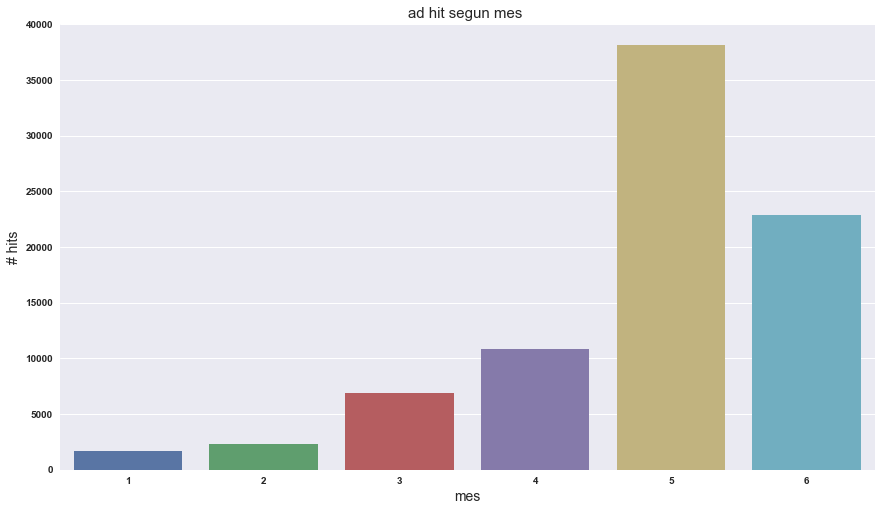

In [165]:
aplot = dfad["month"].value_counts()

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = aplot.index, y = aplot.values)
g.set_title("ad hit segun mes ", fontsize=15)
g.set_xlabel("mes", fontsize=14)
g.set_ylabel("# hits", fontsize=14)

Text(0,0.5,'# hits')

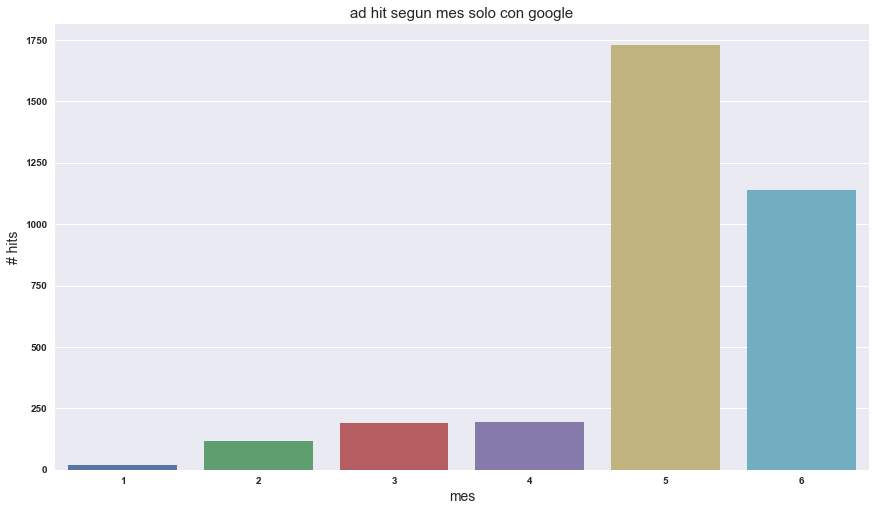

In [182]:
aplot = dfad["month"].loc[dfad["campaign_source"] == "google"].value_counts()

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = aplot.index, y = aplot.values)
g.set_title("ad hit segun mes solo con google", fontsize=15)
g.set_xlabel("mes", fontsize=14)
g.set_ylabel("# hits", fontsize=14)

In [181]:
dfad.groupby("url").size().sort_values(ascending = False).head(2)

url
/                  28323
/comprar/iphone     4132
dtype: int64

Text(0,0.5,'# hits')

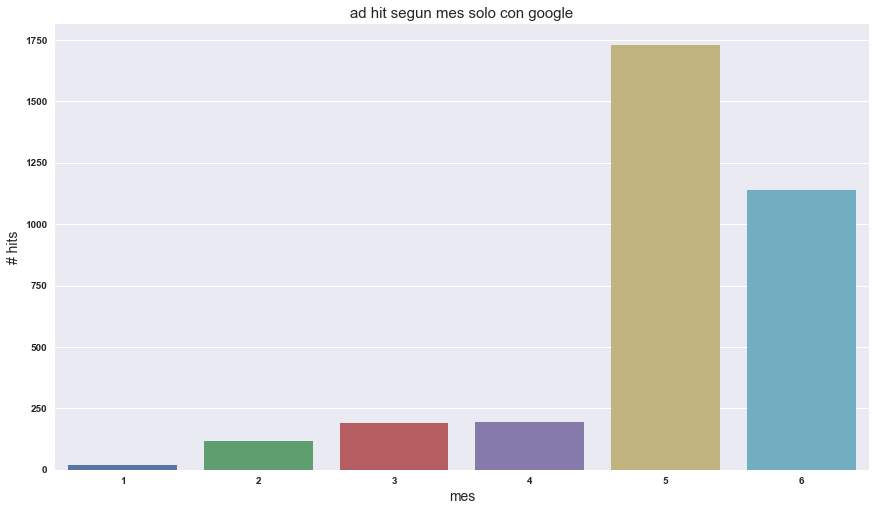

In [180]:
aplot = dfad["month"].loc[dfad["url"] == "/comprar/iphone"].value_counts()

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = aplot.index, y = aplot.values)
g.set_title("ad hit segun mes solo con google", fontsize=15)
g.set_xlabel("mes", fontsize=14)
g.set_ylabel("# hits", fontsize=14)
